# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [6]:
# Create an empty list to store the tweet data
tweets = []

# Open the tweet JSON file and read each line
with open('tweet_json.txt', 'r') as file:
    for line in file:
        # Parse the JSON data
        tweet_json = json.loads(line)
        
        # Extract the required fields
        tweet_id = tweet_json['id']
        retweet_count = tweet_json['retweet_count']
        favorite_count = tweet_json['favorite_count']
        
        # Append the data to the list
        tweets.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

# Create a DataFrame from the tweet data
tweet_data = pd.DataFrame(tweets, columns=['tweet_id', 'retweet_count', 'favorite_count'])

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Twitter API code

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
twitter_archive.shape

(2356, 17)

In [10]:
image_predictions.shape

(2075, 12)

In [11]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [12]:
twitter_archive.duplicated().sum()

0

In [13]:
print(twitter_archive['source'].unique())

[ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']


In [14]:
twitter_archive.head

<bound method DataFrame.head of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

In [15]:
print(image_predictions.duplicated().sum())

0


In [16]:
# Create a new column called predicted_breed that contains the predicted breed for each tweet
image_predictions['predicted_breed'] = ''

for index, row in image_predictions.iterrows():
    if row['p1_dog']:
        image_predictions.at[index, 'predicted_breed'] = row['p1']
    elif row['p2_dog']:
        image_predictions.at[index, 'predicted_breed'] = row['p2']
    elif row['p3_dog']:
        image_predictions.at[index, 'predicted_breed'] = row['p3']
    else:
        image_predictions.at[index, 'predicted_breed'] = 'not a dog'

# Print the value counts of the predicted breeds
print(image_predictions['predicted_breed'].value_counts())

not a dog                         324
golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Maltese_dog                        19
Shetland_sheepdog                  19
Lakeland_terrier                   19
Rottweiler                         19
kuvasz      

In [17]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Quality issues
1.Some rows have retweets and not original ratings (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns are not null).

2.Some rows have missing or incorrect dog names (e.g., "a", "an", "the", "None").

3.Some rows have missing or wrong data in doggo, floofer, pupper, and puppo columns.

4.Some tweets have no images (no corresponding entry in the image_predictions DataFrame).

5.Erroneous datatypes for tweet_id, timestamp, and dog stages.

6.Some rows have missing or incorrect rating numerators and denominators.

7.Some image predictions are not dogs.

8.Some rows have unnecessary HTML tags in the source column.

### Tidiness issues
1.The dog stage (doggo, floofer, pupper, puppo) should be a single column instead of four separate columns.

2.The tweet_data DataFrame should be merged with the twitter_archive DataFrame, as they are part of the same observational unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Issue 1: Removal of retweets

### Define: Here I will remove any retweets

### Code:

In [19]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

### Test:

In [20]:
print("Shape after filtering:", twitter_archive_clean.shape)

('Shape after filtering:', (2175, 17))


In [21]:
twitter_archive.head

<bound method DataFrame.head of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

### Issue 2: Correct dog names

### Define: Replacing incorrect dog names with the correct dog names

### Code:

In [22]:
# Create a list of incorrect dog names and their corresponding correct names
dog_names = {'doggo': 'Dog', 'floofer': 'Dog', 'pupper': 'Pup', 'puppo': 'Pup'}

# Replace the incorrect dog names with the correct ones using the replace method
for incorrect_name, correct_name in dog_names.items():
    twitter_archive['doggo'] = twitter_archive['doggo'].replace(incorrect_name, correct_name)
    twitter_archive['floofer'] = twitter_archive['floofer'].replace(incorrect_name, correct_name)
    twitter_archive['pupper'] = twitter_archive['pupper'].replace(incorrect_name, correct_name)
    twitter_archive['puppo'] = twitter_archive['puppo'].replace(incorrect_name, correct_name)

### Test:

In [23]:
# Create a copy of the dataframe for testing
twitter_archive_test = twitter_archive.copy()

# Create a dictionary of incorrect dog names and their corresponding correct names
dog_names = {'doggo': 'Dog', 'floofer': 'Dog', 'pupper': 'Pup', 'puppo': 'Pup'}

# Replace the incorrect dog names with the correct ones using the replace method
for incorrect_name, correct_name in dog_names.items():
    twitter_archive_test['doggo'] = twitter_archive_test['doggo'].replace(incorrect_name, correct_name)
    twitter_archive_test['floofer'] = twitter_archive_test['floofer'].replace(incorrect_name, correct_name)
    twitter_archive_test['pupper'] = twitter_archive_test['pupper'].replace(incorrect_name, correct_name)
    twitter_archive_test['puppo'] = twitter_archive_test['puppo'].replace(incorrect_name, correct_name)

# Check the unique values in the doggo column after replacing the names
print("Unique values in doggo column:", twitter_archive_test['doggo'].unique())

# Check the unique values in the floofer column after replacing the names
print("Unique values in floofer column:", twitter_archive_test['floofer'].unique())

# Check the unique values in the pupper column after replacing the names
print("Unique values in pupper column:", twitter_archive_test['pupper'].unique())

# Check the unique values in the puppo column after replacing the names
print("Unique values in puppo column:", twitter_archive_test['puppo'].unique())


('Unique values in doggo column:', array(['None', 'Dog'], dtype=object))
('Unique values in floofer column:', array(['None', 'Dog'], dtype=object))
('Unique values in pupper column:', array(['None', 'Pup'], dtype=object))
('Unique values in puppo column:', array(['None', 'Pup'], dtype=object))


In [24]:
twitter_archive.head

<bound method DataFrame.head of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

### Issue 3: Handle missing or wrong data in dog stage columns

### Define: In the dog stage column I will correct any incorrect or missing data

### Code:

In [25]:
# Replace 'None' with an empty string
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages:
    twitter_archive_clean[stage].replace('None', '', inplace=True)

# Combine the columns into a single 'dog_stage' column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

# Clean up the combined 'dog_stage' column
twitter_archive_clean['dog_stage'].replace('', 'None', inplace=True)

### Test:

In [26]:
# Create a copy of the dataframe for testing
twitter_archive_test = twitter_archive_clean.copy()

# Replace 'None' with an empty string
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages:
    twitter_archive_test[stage].replace('None', '', inplace=True)

# Combine the columns into a single 'dog_stage' column
twitter_archive_test['dog_stage'] = twitter_archive_test['doggo'] + twitter_archive_test['floofer'] + twitter_archive_test['pupper'] + twitter_archive_test['puppo']

# Clean up the combined 'dog_stage' column
twitter_archive_test['dog_stage'].replace('', 'None', inplace=True)

# Check the unique values in the dog_stage column after the transformation
print("Unique values in dog_stage column:", twitter_archive_test['dog_stage'].unique())

('Unique values in dog_stage column:', array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object))


### Issue 4: Remove tweets without images

### Define: If a tweet does not have an image I will remove it.

### Code:

In [27]:
# Keep only rows with tweet_id present in the image_predictions_clean DataFrame
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id)]

### Test:

In [28]:
print("Shape after filtering:", twitter_archive_clean.shape)

('Shape after filtering:', (1994, 18))


### Issue 5: Fix erroneous datatypes

### Define: Handle any erroneous data

### Code:

In [29]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

### Test:

In [30]:
# Create a copy of the dataframe for testing
twitter_archive_test = twitter_archive_clean.copy()

# Convert 'tweet_id' column to string data type
twitter_archive_test['tweet_id'] = twitter_archive_test['tweet_id'].astype(str)

# Convert 'timestamp' column to datetime data type
twitter_archive_test['timestamp'] = pd.to_datetime(twitter_archive_test['timestamp'])

# Convert 'dog_stage' column to categorical data type
twitter_archive_test['dog_stage'] = twitter_archive_test['dog_stage'].astype('category')

# Check the data types of the columns after conversion
print("Data types after conversion:")
print(twitter_archive_test.dtypes)

Data types after conversion:
tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dog_stage                           category
dtype: object


### Issue 6: Fix incorrect rating numerators and denominators

### Define: Any wrong numerators or denominators will be corrected here.

### Code:

In [31]:
twitter_archive['rating_numerator'] = twitter_archive['rating_numerator'].astype(float)
twitter_archive['rating_denominator'] = twitter_archive['rating_denominator'].astype(float)


### Test:

In [32]:
twitter_archive_test = twitter_archive.copy()

# Convert 'rating_numerator' column to float data type
twitter_archive_test['rating_numerator'] = twitter_archive_test['rating_numerator'].astype(float)

# Convert 'rating_denominator' column to float data type
twitter_archive_test['rating_denominator'] = twitter_archive_test['rating_denominator'].astype(float)

# Check the data types of the columns after conversion
print("Data types after conversion:")
print(twitter_archive_test[['rating_numerator', 'rating_denominator']].dtypes)

Data types after conversion:
rating_numerator      float64
rating_denominator    float64
dtype: object


### Issue 7: Remove rows with image predictions that are not dogs

### Define: Any image that is not a dog will be removed here.

### Code:

In [33]:
image_predictions_clean = image_predictions_clean[(image_predictions_clean.p1_dog) | (image_predictions_clean.p2_dog) | (image_predictions_clean.p3_dog)]


### Test:

In [34]:
# Create a copy of the dataframe for testing
image_predictions_test = image_predictions_clean.copy()

# Filter out rows where none of the dog predictions (p1_dog, p2_dog, p3_dog) are True
image_predictions_test = image_predictions_test[(image_predictions_test.p1_dog) | (image_predictions_test.p2_dog) | (image_predictions_test.p3_dog)]

# Check the shape of the dataframe after filtering
print("Shape after filtering:", image_predictions_test.shape)

('Shape after filtering:', (1751, 13))


### Issue 8: Remove HTML tags from the Source column

### Define: I will remove the HTML tags here from the Source column

### Code:

In [35]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('<a[^>]*>([^<]*)</a>', expand=True)

### Test:

In [36]:
# Create a copy of the dataframe for testing
twitter_archive_test = twitter_archive_clean.copy()

# Extract the source from the HTML tag using regular expressions
twitter_archive_test['source'] = twitter_archive_test['source'].str.extract('<a[^>]*>([^<]*)</a>', expand=True)

# Display the updated 'source' column
print(twitter_archive_test['source'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
31      NaN
       ... 
2326    NaN
2327    NaN
2328    NaN
2329    NaN
2330    NaN
2331    NaN
2332    NaN
2333    NaN
2334    NaN
2335    NaN
2336    NaN
2337    NaN
2338    NaN
2339    NaN
2340    NaN
2341    NaN
2342    NaN
2343    NaN
2344    NaN
2345    NaN
2346    NaN
2347    NaN
2348    NaN
2349    NaN
2350    NaN
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: source, Length: 1994, dtype: object


### Tidiness Issue 1: The dog stage(doggo, floofer, pupper, puppo) should be a single column instead of four separate columns.

### Define:  I need to condense the four dog stages in to one column.

#### I have already solved and tested this Tidiness Issue in Issue #3

### Tidiness Issue 2: Merge tweet_data_clean with twitter_archive_clean

### Define: I need to merge the two data sets.

### Code:

In [37]:
# First, rename the 'id' column in tweet_data_clean to 'tweet_id' to match twitter_archive_clean
tweet_data_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

# Convert 'tweet_id' in tweet_data_clean to string type
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str)

# Merge the DataFrames on 'tweet_id'
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, on='tweet_id', how='left')

### Test:

In [38]:
# Create copies of the dataframes for testing
twitter_archive_test = twitter_archive_clean.copy()
tweet_data_test = tweet_data_clean.copy()

# Rename the 'id' column in tweet_data_clean to 'tweet_id'
tweet_data_test.rename(columns={'id': 'tweet_id'}, inplace=True)

# Convert 'tweet_id' column to string type
tweet_data_test['tweet_id'] = tweet_data_test['tweet_id'].astype(str)

# Merge the dataframes on 'tweet_id'
twitter_archive_test = pd.merge(twitter_archive_test, tweet_data_test, on='tweet_id', how='left')

# Check the merged dataframe
print(twitter_archive_test.head())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iPhone   
1 2017-08-01 00:17:27  Twitter for iPhone   
2 2017-07-31 00:18:03  Twitter for iPhone   
3 2017-07-30 15:58:51  Twitter for iPhone   
4 2017-07-29 16:00:24  Twitter for iPhone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  Thi

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
# Concatenate the cleaned dataframes into a master dataframe
twitter_archive_master = pd.concat([twitter_archive_clean, image_predictions_clean, tweet_data_clean], axis=1)

# Save the master dataframe to a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Assessed and cleaned data used: twitter_archive_clean

One of the insights that can be derived from the cleaned Twitter archive data is the distribution of dog ratings. We can analyze the rating numerator and denominator to understand the most common ratings given to dogs.
2. Assessed and cleaned data used: twitter_archive_clean and image_predictions_clean

Another interesting insight can be obtained by examining the most predicted dog breeds based on the image predictions. We can analyze the top predicted dog breeds and their frequencies.

3. Assessed and cleaned data used: twitter_archive_clean and tweet_data_clean

We can analyze the correlation between the number of retweets and favorite counts to understand the engagement of tweets among users.

### Visualization

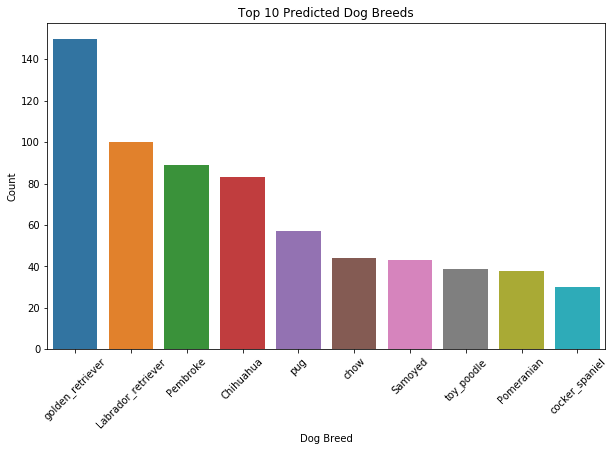

In [43]:
# Get the top 10 predicted dog breeds
top_breeds = image_predictions_clean['p1'].value_counts().head(10)

# Plot a bar chart of the top predicted dog breeds
plt.figure(figsize=(10, 6))
sns.barplot(x=top_breeds.index, y=top_breeds.values)
plt.title('Top 10 Predicted Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()